In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160222_NO_fixSynAir"

input = "../DOAS/#{prefix}.csv"

input_sum = "../DOAS/#{prefix}_sum.csv"

img_cal = "../images/#{prefix}.png"

flow_air = 3.0
flow_no_offset = 0.004
c_no = 8.177e3

nil

# Data Preparation

In [3]:
d = DataFrame.from_csv(input)
d.vectors = Index.new(d.vectors.to_a.map{|i| i.to_sym})
d.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,-0.106358749190746,0.174395974971167,319865.126852618,1655022.97497006,0,0.429599737055407,0.116559107628531,327.393092460128,2066.58757796886,2016-02-22T16:58:25+01:00
1,0.00474149769827602,0.167796935025674,192358.110539805,1592482.90865962,1,0.107519075412113,0.112092460354896,713.495584840294,1988.51443937535,2016-02-22T16:58:57+01:00
2,-0.13029766310599,0.180209809318295,-1143380.9532271,1571269.74833324,2,0.072947559159484,0.110461405580827,-36.5983998843187,1973.95717326321,2016-02-22T16:59:28+01:00
3,0.0584172850674428,0.204321780972617,-314026.401405305,1660453.95779668,3,0.100793856096622,0.114663851157787,105.41636552247,2073.58167775327,2016-02-22T16:59:59+01:00
4,0.0376070179020519,0.181558065099279,220838.673452886,1723083.41362537,4,0.0190442664936282,0.121285232123809,-198.711386444455,2151.59373429393,2016-02-22T17:00:30+01:00
5,0.054366182973949,0.204409536765944,263514.066818254,1674561.99168538,5,0.0973561697191554,0.116287870823722,211.603537332455,2096.97322374767,2016-02-22T17:01:01+01:00
6,-0.0108330397736986,0.167901674916153,880329.404821422,1593476.94639588,6,0.000568869678492924,0.112162429165824,-7.57065700360776,1989.75568245624,2016-02-22T17:01:32+01:00
7,-0.0406038463064108,0.180514486482925,-1045885.10776017,1534327.96960485,7,0.114472289541302,0.107681717177606,311.389168995219,1929.546794198,2016-02-22T17:02:03+01:00
8,-0.0377613834819311,0.163853021533802,22971.974268867,1555053.05436534,8,0.034330101883573,0.109457829593237,481.472412815032,1941.77622615927,2016-02-22T17:02:34+01:00
9,-0.135002730461702,0.170469367375784,277553.875532949,1617845.72497953,9,0.107307789639736,0.113877710587328,-149.72675367178,2020.18468600789,2016-02-22T17:03:05+01:00


# Plot

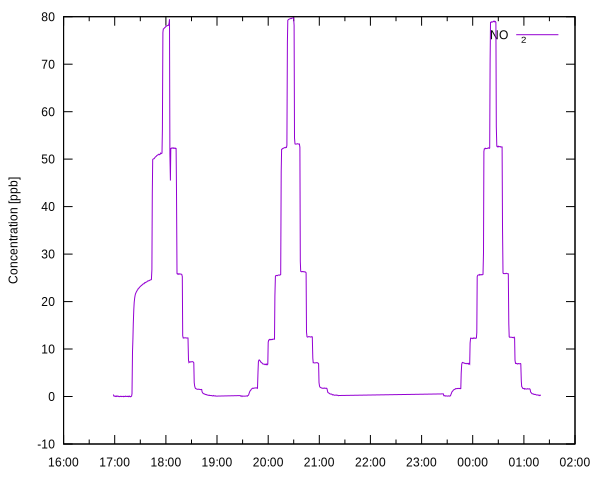

In [4]:
d.index = DateTimeIndex.new(d[:timestamp])

Plot.new(
  [d[:no2], with: "lines", title: "NO_2"],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

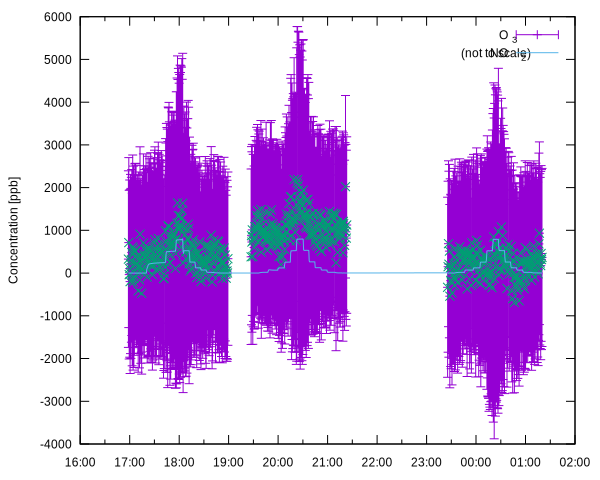

In [5]:
d.index = DateTimeIndex.new(d[:timestamp])

Plot.new(
  [d[:o3, :o3_err], with: "yerrorbars", title:"O_3"],
  [d[:o3], title: ""],
  [d[:no2]*10, with: "lines", title: "NO_2 (not to scale)"],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

# Compute Averages

In [6]:
summary = DataFrame.from_csv(input_sum)
summary.vectors = Index.new(summary.vectors.to_a.map{|i| i.to_sym})
summary.head

,flow,length,start,stop
0,0.1,5,70,80
1,0.2,5,94,110
2,0.3,5,115,125
3,0.2,5,131,141
4,0.1,5,145,155
5,0.05,5,158,168
6,0.03,5,171,181
7,0.01,5,189,199
8,0.01,10,262,272
9,0.03,10,285,295


In [7]:
summary[:no_comp] = summary.collect_rows do |row|
  c_no*(row[:flow] - flow_no_offset)*0.1/((row[:flow]-flow_no_offset)*0.1 + flow_air)
end
summary

,flow,length,start,stop,no_comp
0,0.1,5,70,80,26.0829346092504
1,0.2,5,94,110,53.076301496887005
2,0.3,5,115,125,79.89147082123053
3,0.2,5,131,141,53.076301496887005
4,0.1,5,145,155,26.0829346092504
5,0.05,5,158,168,12.518871064367971
6,0.03,5,171,181,7.0805968160927195
7,0.01,5,189,199,1.6350729854029196
8,0.01,10,262,272,1.6350729854029196
9,0.03,10,285,295,7.0805968160927195


In [8]:
d.index = Index.new(d[:index].to_a)

summary[:no] = Array.new(summary.nrows)
summary[:no_err] = Array.new(summary.nrows)

summary.recode_rows do |row|
  
  pointer = d[:index].map do |i|
    ret = false
    
    if i >= row[:start] and i <= row[:stop]
      ret = true
    end
    ret
  end
  
  subset = d.where(pointer)
  
  if subset.nrows == 0
    row[:no] = nil
    row[:no_err] = nil
  else
    row[:no] = subset[:no2].mean
    row[:no_err] = subset[:no2].std/Math::sqrt(subset.nrows.to_f)
  end
  
  row
end

,flow,length,start,stop,no_comp,no,no_err
0,0.1,5,70,80,26.0829346092504,24.15056939280909,0.052162492961680004
1,0.2,5,94,110,53.076301496887005,50.888710134483574,0.06914928873490064
2,0.3,5,115,125,79.89147082123053,77.960465734841,0.0679567326294098
3,0.2,5,131,141,53.076301496887005,52.30708800815837,0.013329659274987823
4,0.1,5,145,155,26.0829346092504,25.792610135166026,0.015580124340830713
5,0.05,5,158,168,12.518871064367971,12.341788347522764,0.006444824706049098
6,0.03,5,171,181,7.0805968160927195,7.288757205225323,0.013486855401425525
7,0.01,5,189,199,1.6350729854029196,1.513861260630042,0.010373328099248458
8,0.01,10,262,272,1.6350729854029196,1.7828709838690946,0.011734299666458382
9,0.03,10,285,295,7.0805968160927195,6.785897820264413,0.01802140610800715


In [9]:
plot = Plot.new(
  [summary[:no_comp, :no, :no_err], using: "2:3:4", with: "yerrorbars", title: ""],
  xlabel: "Concentration, computed [ppb]",
  ylabel: "Concentration, DOAS [ppb]"
  )
nil

In [10]:
fit = fit_poly(summary[:no_comp, :no, :no_err], degree: 1, using: "2:3:4")
fit[:formula_ds].data

" 0.00397511*x**0 + 0.993595*x**1 "

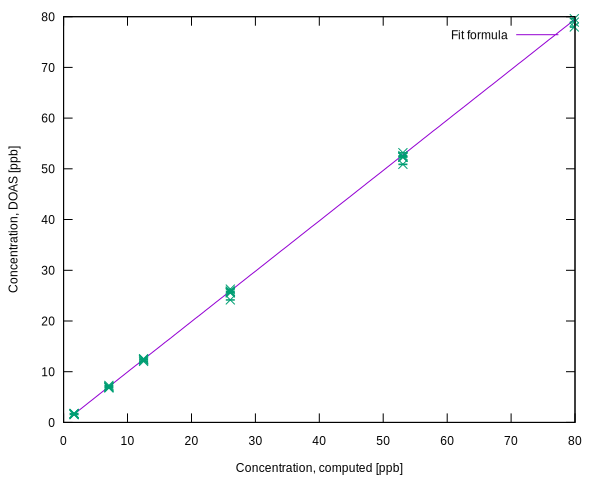

In [11]:
(plot << fit[:formula_ds]).to_png(img_cal)

# Length dependence

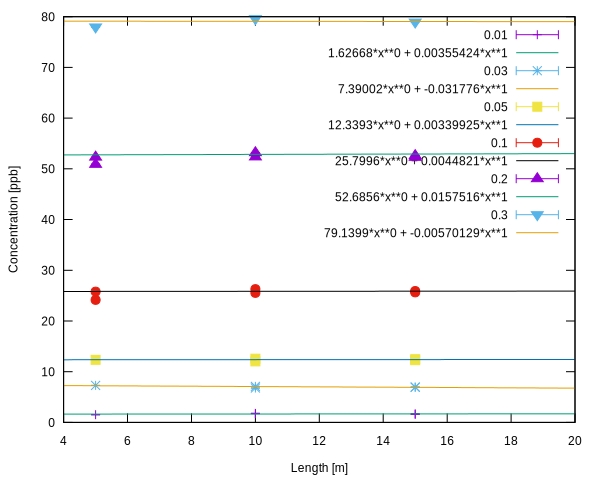

In [12]:
tmp = []

[0.01, 0.03, 0.05, 0.1, 0.2, 0.3].each do |flow|
  tmp << [ summary.where(summary[:flow].eq(flow))[:length, :no, :no_err], using: "2:3:4", 
    with: "yerrorbars", title: "#{flow}"]
  fit = fit_poly(summary.where(summary[:flow].eq(flow))[:length, :no, :no_err], using: "2:3:4", degree: 1)
  fit[:formula_ds].title = fit[:formula_ds].data
  tmp << fit[:formula_ds]
end

#summary.where(summary[:flow].eq(0.1))
plot = Plot.new(*tmp,
  xlabel: "Length [m]",
  ylabel: "Concentration [ppb]",
  xrange: 4..20)